<a href="https://colab.research.google.com/github/divyadharshiniaiml/Myprojects/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Hepatitis C virus Prediction
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
Hepatitis = pd.read_csv('/content/HepatitisCdataF.csv')
Hepatitis.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
Hepatitis = Hepatitis.iloc[:, 1:]
Hepatitis.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
Hepatitis.info()
Hepatitis.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


In [ ]:
imputer = KNNImputer(n_neighbors= 5)
numeric_df = Hepatitis.select_dtypes(include='float64')
imputed_Hepatits = imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_Hepatits ,columns=numeric_df.columns)
Hepatitis[numeric_df.columns] = imputed_df
Hepatitis.isna().sum()

,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0
CHOL,0


In [ ]:
Hepatitis.Category.value_counts()

,count
Category,
0=Blood Donor,533
3=Cirrhosis,30
1=Hepatitis,24
2=Fibrosis,21
0s=suspect Blood Donor,7


In [ ]:
#Encoding Categorical Variables
encoded_data = Hepatitis.copy()

# Encoding the 'Category' column
label_encoder = LabelEncoder()
encoded_data['Category'] = label_encoder.fit_transform(encoded_data['Category'])

# Encoding the 'Sex' column (if present)
if 'Sex' in encoded_data.columns:
    encoded_data['Sex'] = label_encoder.fit_transform(encoded_data['Sex'])

# Display the first few rows of the dataset to check the encoding
print("Encoded Dataset:")
print(encoded_data.head())

# To map the encoded values back to the original labels (optional)
category_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Category Encoding Mapping:", category_mapping)


Encoded Dataset:
   Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0         0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1         0   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2         0   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3         0   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4         0   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7
Category Encoding Mapping: {'f': 0, 'm': 1}


In [ ]:
#Detect and Handle Outliers
data_without_outliers = Hepatitis.copy()

# Function to detect and handle outliers using IQR
def handle_outliers(df, columns):
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Check for numerical columns
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define the lower and upper bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers with bounds (Winsorization)
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

            print(f"Handled outliers in column '{col}' with bounds ({lower_bound}, {upper_bound}).")

# List of numerical columns
numerical_columns = data_without_outliers.select_dtypes(include=['float64', 'int64']).columns

# Call the function to handle outliers
handle_outliers(data_without_outliers, numerical_columns)

# Display the first few rows after outlier handling
print("Dataset after handling outliers:")
print(data_without_outliers.head())


Handled outliers in column 'Age' with bounds (16.5, 76.5).
Handled outliers in column 'ALB' with bounds (29.19999999999999, 54.80000000000001).
Handled outliers in column 'ALP' with bounds (12.750000000000007, 119.94999999999999).
Handled outliers in column 'ALT' with bounds (-8.575, 58.02499999999999).
Handled outliers in column 'AST' with bounds (4.650000000000006, 49.849999999999994).
Handled outliers in column 'BIL' with bounds (-3.55, 20.049999999999997).
Handled outliers in column 'CHE' with bounds (2.9525000000000015, 13.572499999999998).
Handled outliers in column 'CHOL' with bounds (2.4325, 8.252500000000001).
Handled outliers in column 'CREA' with bounds (35.5, 119.5).
Handled outliers in column 'GGT' with bounds (-21.050000000000008, 76.95000000000002).
Handled outliers in column 'PROT' with bounds (60.149999999999984, 84.55000000000001).
Dataset after handling outliers:
        Category   Age Sex   ALB   ALP   ALT    AST   BIL    CHE  CHOL   CREA   GGT  PROT
0  0=Blood Dono

In [ ]:
#Normalize Numerical Features
scaler = MinMaxScaler()
numerical_features = Hepatitis.select_dtypes(include=['float64', 'int64']).columns


Hepatitis[numerical_features] = scaler.fit_transform(Hepatitis[numerical_features])

In [ ]:
print(Hepatitis.head())

        Category       Age Sex       ALB  ...      CHOL      CREA       GGT      PROT
0  0=Blood Donor  0.224138   m  0.350669  ...  0.218447  0.091495  0.011757  0.535398
1  0=Blood Donor  0.224138   m  0.350669  ...  0.408981  0.061619  0.017172  0.701327
2  0=Blood Donor  0.224138   m  0.475483  ...  0.457524  0.072822  0.044400  0.763274
3  0=Blood Donor  0.224138   m  0.420505  ...  0.401699  0.067221  0.045328  0.683628
4  0=Blood Donor  0.224138   m  0.361070  ...  0.350728  0.063486  0.039295  0.528761

[5 rows x 13 columns]


In [ ]:
#Address Class Imbalance
X = Hepatitis.drop('Category', axis=1)
y = Hepatitis['Category']

# Identify categorical features (if any)
categorical_features = X.select_dtypes(include=['object']).columns

# Label encode categorical features
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Apply BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)
X_res, y_res = bsmote.fit_resample(X, y)







In [ ]:
#KNN
# Assuming X_res and y_res are your features and target after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create a kNN classifier (e.g., with k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))


Accuracy: 0.9774859287054409
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.90      0.95       113
0s=suspect Blood Donor       1.00      1.00      1.00       116
           1=Hepatitis       0.93      1.00      0.97       100
            2=Fibrosis       0.96      0.99      0.98       107
           3=Cirrhosis       0.99      1.00      0.99        97

              accuracy                           0.98       533
             macro avg       0.98      0.98      0.98       533
          weighted avg       0.98      0.98      0.98       533



In [ ]:
print(Hepatitis.head())

        Category       Age Sex       ALB  ...      CHOL      CREA       GGT      PROT
0  0=Blood Donor  0.224138   m  0.350669  ...  0.218447  0.091495  0.011757  0.535398
1  0=Blood Donor  0.224138   m  0.350669  ...  0.408981  0.061619  0.017172  0.701327
2  0=Blood Donor  0.224138   m  0.475483  ...  0.457524  0.072822  0.044400  0.763274
3  0=Blood Donor  0.224138   m  0.420505  ...  0.401699  0.067221  0.045328  0.683628
4  0=Blood Donor  0.224138   m  0.361070  ...  0.350728  0.063486  0.039295  0.528761

[5 rows x 13 columns]


In [ ]:
#Decision Trees
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.9530956848030019
                        precision    recall  f1-score   support

         0=Blood Donor       0.96      0.91      0.94       113
0s=suspect Blood Donor       0.97      1.00      0.99       116
           1=Hepatitis       0.92      0.98      0.95       100
            2=Fibrosis       0.94      0.93      0.94       107
           3=Cirrhosis       0.96      0.94      0.95        97

              accuracy                           0.95       533
             macro avg       0.95      0.95      0.95       533
          weighted avg       0.95      0.95      0.95       533



In [ ]:
# Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.9924953095684803
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.97      0.99       113
0s=suspect Blood Donor       0.99      1.00      1.00       116
           1=Hepatitis       0.97      1.00      0.99       100
            2=Fibrosis       1.00      0.99      1.00       107
           3=Cirrhosis       1.00      1.00      1.00        97

              accuracy                           0.99       533
             macro avg       0.99      0.99      0.99       533
          weighted avg       0.99      0.99      0.99       533



In [ ]:
#Logistic Regression
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42, multi_class='ovr')

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.9212007504690432
                        precision    recall  f1-score   support

         0=Blood Donor       0.92      0.86      0.89       113
0s=suspect Blood Donor       0.97      1.00      0.99       116
           1=Hepatitis       0.86      0.90      0.88       100
            2=Fibrosis       0.88      0.92      0.89       107
           3=Cirrhosis       0.99      0.93      0.96        97

              accuracy                           0.92       533
             macro avg       0.92      0.92      0.92       533
          weighted avg       0.92      0.92      0.92       533



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Support Vector Machine
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can try different kernels like 'linear', 'poly'

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))



Accuracy: 0.9681050656660413
                        precision    recall  f1-score   support

         0=Blood Donor       0.96      0.95      0.95       113
0s=suspect Blood Donor       1.00      1.00      1.00       116
           1=Hepatitis       0.96      0.95      0.95       100
            2=Fibrosis       0.94      0.99      0.96       107
           3=Cirrhosis       0.99      0.95      0.97        97

              accuracy                           0.97       533
             macro avg       0.97      0.97      0.97       533
          weighted avg       0.97      0.97      0.97       533



In [ ]:
#Neural Network
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# One-hot encode the target variable if it's not already
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use appropriate loss for your task
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3784 - loss: 1.5401
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 1.1391
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.6889
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8908 - loss: 0.4549
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9066 - loss: 0.3248
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9239 - loss: 0.2937
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9272 - loss: 0.2463
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9540 - loss: 0.1949
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9426 - loss: 0.1996
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.1735
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9513 - loss: 0.2039  
Test Loss: 0.16912317276000977
Test Accuracy: 0.9587242007255554


In [ ]:
#Naive Bayes
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))


Accuracy: 0.9155722326454033
                        precision    recall  f1-score   support

         0=Blood Donor       0.88      0.93      0.91       113
0s=suspect Blood Donor       0.98      1.00      0.99       116
           1=Hepatitis       0.87      0.93      0.90       100
            2=Fibrosis       0.88      0.83      0.86       107
           3=Cirrhosis       0.97      0.88      0.92        97

              accuracy                           0.92       533
             macro avg       0.92      0.91      0.91       533
          weighted avg       0.92      0.92      0.92       533



<ipython-input-30-6515ea727bec>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)  # Fill numeric columns with mean


Accuracy Score: 0.991869918699187

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.99       123
   macro avg       0.80      0.80      0.80       123
weighted avg       0.98      0.99      0.99       123


Confusion Matrix:
[[107   0   0   0   0]
 [  1   0   0   0   0]
 [  0   0   5   0   0]
 [  0   0   0   4   0]
 [  0   0   0   0   6]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


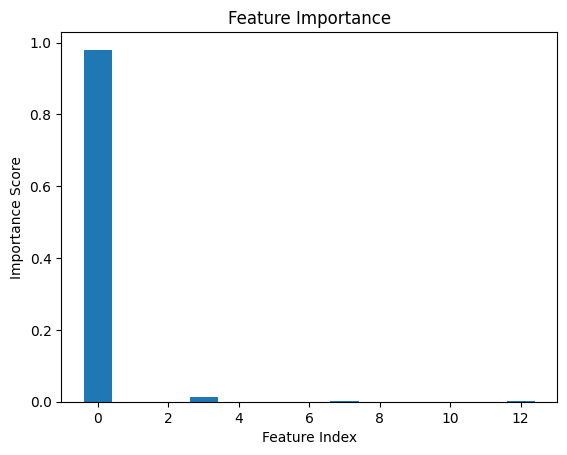

In [ ]:
#GradientBoostingClassifier
# Function to preprocess the dataset
def preprocess_data(data):
    # Handle missing values separately for numeric and non-numeric columns
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            data[col].fillna(data[col].mean(), inplace=True)  # Fill numeric columns with mean
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)  # Fill categorical columns with mode

    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Category'] = label_encoder.fit_transform(data['Category'])  # Encode target variable
    if 'Sex' in data.columns:
        data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Encode 'Sex' column if it exists

    # Separate features (X) and target (y)
    X = data.drop('Category', axis=1)
    y = data['Category']

    # Standardize numerical features only
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

    return X, y, label_encoder

# Load your dataset (replace this with your actual data-loading step)
# For example: Hepatitis = pd.read_csv('path_to_file.csv')

# Preprocess the data
X, y, label_encoder = preprocess_data(Hepatitis)

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = gb_model.predict(X_test)

# Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = gb_model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()
